In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgbm
import datetime

from sklearn.model_selection import GroupKFold
from sklearn import metrics

In [2]:
ID_52_2020_0809 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_52_2020_0809.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

<AxesSubplot:xlabel='CreateDateTime'>

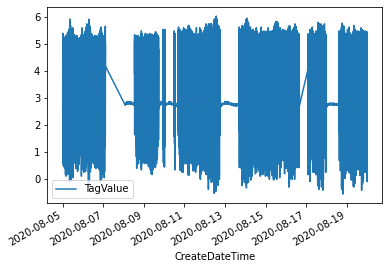

In [73]:
ID_52_2020_0809.plot('CreateDateTime','TagValue')

<AxesSubplot:xlabel='CreateDateTime'>

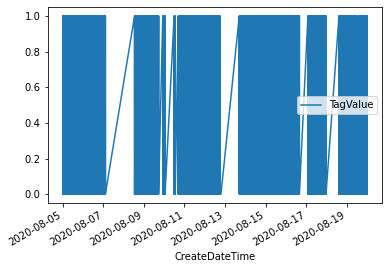

In [8]:
data = ID_133_2020
data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
data.plot('CreateDateTime','TagValue')

<AxesSubplot:xlabel='CreateDateTime'>

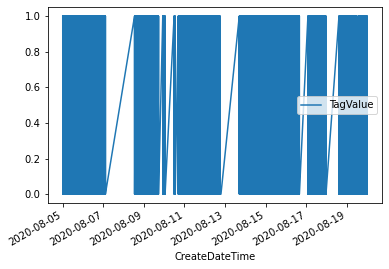

In [9]:
data = ID_134_2020
data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
data.plot('CreateDateTime','TagValue')

<AxesSubplot:xlabel='CreateDateTime'>

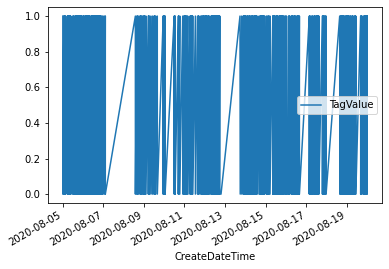

In [10]:
data = ID_45_2020
data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
data.plot('CreateDateTime','TagValue')

<AxesSubplot:xlabel='CreateDateTime'>

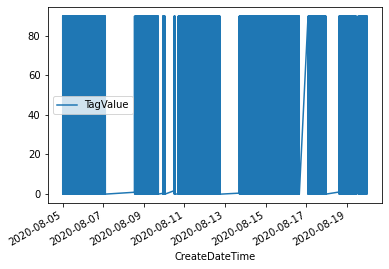

In [11]:
data = ID_70_2020
data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
data.plot('CreateDateTime','TagValue')

In [75]:
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re

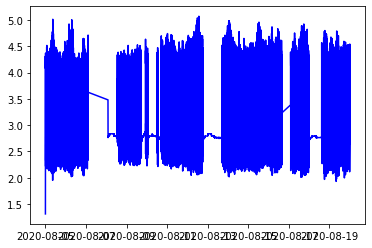

In [76]:
y = ID_52_2020_0809['TagValue']
y_av = moving_average(y, 10)
plt.plot(ID_52_2020_0809['CreateDateTime'], y_av, 'b')

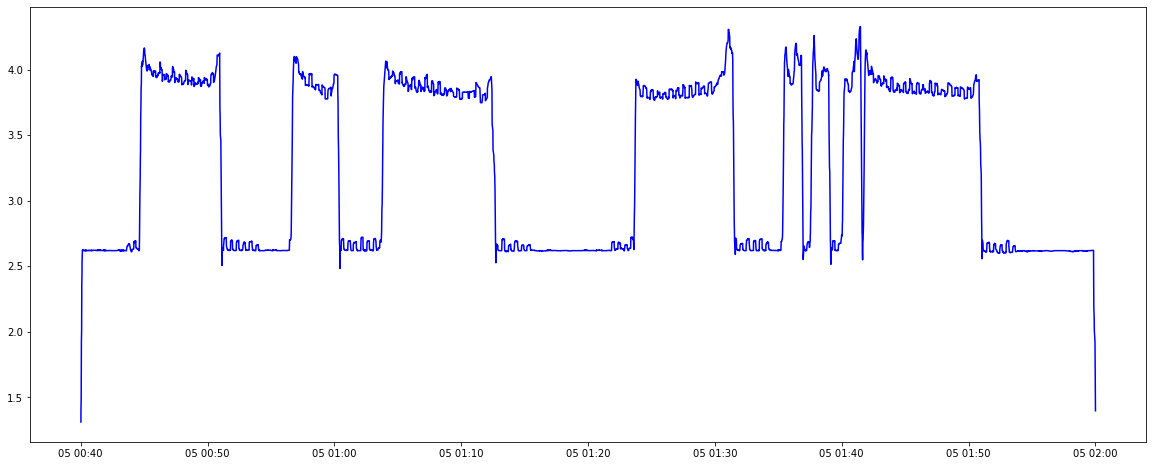

In [77]:
Daten_1=ID_52_2020_0809
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 00:40:00')&(Daten_1['CreateDateTime']<'2020-08-05 02:00:00')]
f = Daten_1['TagValue']
f_av = moving_average(f, 30)
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(Daten_1['CreateDateTime'], f_av, 'b')

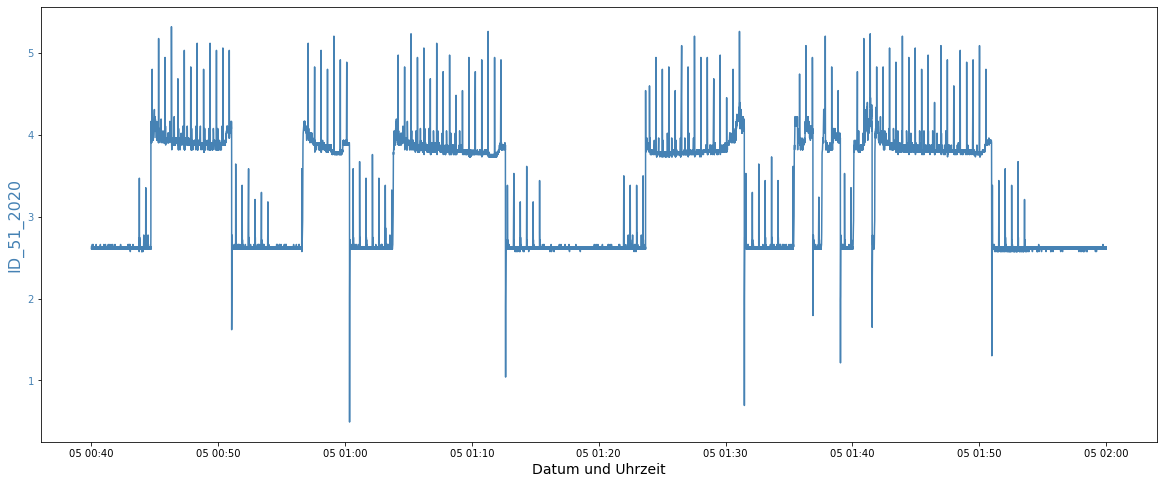

In [78]:
Daten_1=ID_52_2020_0809
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 00:40:00')&(Daten_1['CreateDateTime']<'2020-08-05 02:00:00')]
fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_51_2020', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))

In [3]:
ID_85_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_86_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

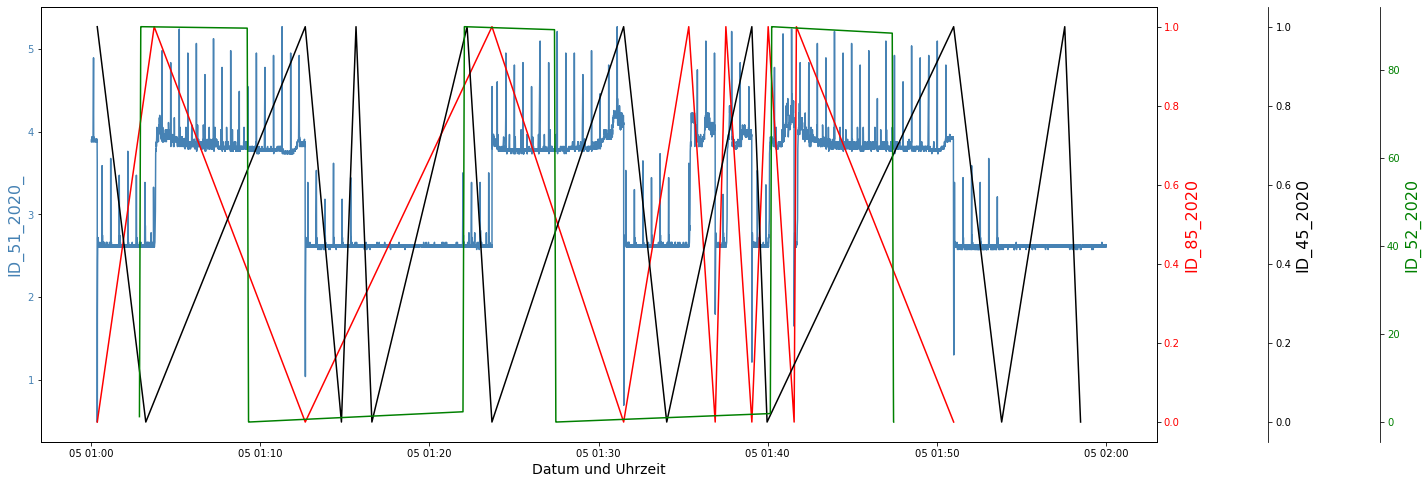

In [80]:
Daten_1=ID_52_2020_0809
Daten_2=ID_85_2020
Daten_3=ID_86_2020
Daten_4=ID_70_2020
Daten_5=ID_133_2020


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 01:00:00')&(Daten_1['CreateDateTime']<'2020-08-05 02:00:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-08-05 01:00:00')&(Daten_2['CreateDateTime']<'2020-08-05 02:00:00')]
Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-08-05 01:00:00')&(Daten_3['CreateDateTime']<'2020-08-05 02:00:00')]
Daten_4=Daten_4[(Daten_4['CreateDateTime']>'2020-08-05 01:00:00')&(Daten_4['CreateDateTime']<'2020-08-05 02:00:00')]
Daten_5=Daten_5[(Daten_5['CreateDateTime']>'2020-08-05 01:00:00')&(Daten_5['CreateDateTime']<'2020-08-05 02:00:00')]



fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_51_2020_', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('ID_85_2020', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
#plt.ylim((-1,10))

ax3 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax3.set_ylabel('ID_45_2020', color=col3, fontsize=16)
ax3.plot(Daten_3.CreateDateTime, Daten_3.TagValue, color=col3)
ax3.tick_params(axis='y', labelcolor=col3)
ax3.spines["right"].set_position(("axes", 1.1))

ax4 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax4.set_ylabel('ID_52_2020', color=col4, fontsize=16)
ax4.plot(Daten_4.CreateDateTime, Daten_4.TagValue, color=col4)
ax4.tick_params(axis='y', labelcolor=col4)
ax4.spines["right"].set_position(("axes", 1.2))

# ax5 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax5.set_ylabel('ID_133_2020', color=col5, fontsize=16)
# ax5.plot(Daten_5.CreateDateTime, Daten_5.TagValue, color=col5)
# ax5.tick_params(axis='y', labelcolor=col5)
# ax5.spines["right"].set_position(("axes", 1.3))

In [4]:
TREE_1=ID_52_2020_0809
TREE_1.rename(columns = {'TagValue':'TagValue_52'}, inplace=True)

In [5]:
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
#     TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1

In [6]:
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_70'}, inplace=True)
TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_86'}, inplace=True)
TREE_1 = zusammen(ID_133_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_133'}, inplace=True)
TREE_1 = zusammen(ID_134_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_134'}, inplace=True)
TREE_1 = zusammen(ID_135_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_135'}, inplace=True)
TREE_1 = zusammen(ID_136_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_136'}, inplace=True)
TREE_1 = zusammen(ID_137_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_137'}, inplace=True)
TREE_1 = zusammen(ID_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_138'}, inplace=True)
TREE_1

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138
0,2020-08-05 00:00:00.348,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-05 00:00:01.175,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-05 00:00:01.568,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-05 00:00:02.403,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2624219,2020-08-19 23:59:59.218,4.542824,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2624220,2020-08-19 23:59:59.424,4.513889,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2624221,2020-08-19 23:59:59.632,4.456018,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
TREE_1['TagValue_85'] = TREE_1['TagValue_85'].fillna(method = "ffill")
TREE_1['TagValue_86'] = TREE_1['TagValue_86'].fillna(method = "ffill")
TREE_1['TagValue_45'] = TREE_1['TagValue_45'].fillna(method = "ffill")
TREE_1['TagValue_70'] = TREE_1['TagValue_70'].fillna(method = "ffill")
TREE_1['TagValue_133'] = TREE_1['TagValue_133'].fillna(method = "ffill")
TREE_1['TagValue_134'] = TREE_1['TagValue_134'].fillna(method = "ffill")
TREE_1['TagValue_135'] = TREE_1['TagValue_135'].fillna(method = "ffill")
TREE_1['TagValue_136'] = TREE_1['TagValue_136'].fillna(method = "ffill")
TREE_1['TagValue_137'] = TREE_1['TagValue_137'].fillna(method = "ffill")
TREE_1['TagValue_138'] = TREE_1['TagValue_138'].fillna(method = "ffill")
TREE_1

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138
0,2020-08-05 00:00:00.348,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-05 00:00:01.175,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-05 00:00:01.568,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-05 00:00:02.403,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624219,2020-08-19 23:59:59.218,4.542824,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624220,2020-08-19 23:59:59.424,4.513889,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624221,2020-08-19 23:59:59.632,4.456018,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
TREE_1.isnull().sum()

CreateDateTime        0
TagValue_52       73710
TagId             73710
TagValue_85         779
TagValue_45        1768
TagValue_70         595
TagValue_86         490
TagValue_133        596
TagValue_134        692
TagValue_135        761
TagValue_136        863
TagValue_137        959
TagValue_138       1055
dtype: int64

In [9]:
TREE_1['diff_float'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()
TREE_1

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
0,2020-08-05 00:00:00.348,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626
2,2020-08-05 00:00:01.175,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201
3,2020-08-05 00:00:01.568,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393
4,2020-08-05 00:00:02.403,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217
2624219,2020-08-19 23:59:59.218,4.542824,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
2624220,2020-08-19 23:59:59.424,4.513889,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
2624221,2020-08-19 23:59:59.632,4.456018,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208


In [10]:
TREE_1.loc[TREE_1['diff_float'] > 1800]

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
432117,2020-08-08 02:00:01.298,2.748842,52.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84460.295
1946547,2020-08-16 02:00:01.034,4.224537,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3393.453
2067036,2020-08-17 02:00:00.302,4.050926,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36129.919


In [11]:
def NaNjgtc(data):
#     columns = [col for col in data.columns if col in ['CreateDateTime', 'TagValue_51', 'diff_float']]
#     X = TREE_1[columns]
#     X.isnull().sum()
#     X.loc[(X['diff_float'] > 1800)]
    data.loc[(data['diff_float'] > 1800),'TagValue_52'] = data.loc[(data['diff_float'] > 1800),'TagValue_52'].fillna(0)
#     X.loc[(X['diff_float'] > 1800)]
#     X.isnull().sum()
    return data

In [12]:
TREE_2 = NaNjgtc(TREE_1)
TREE_2

,CreateDateTime,TagValue_52,TagId,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
0,2020-08-05 00:00:00.348,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626
2,2020-08-05 00:00:01.175,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201
3,2020-08-05 00:00:01.568,2.604167,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393
4,2020-08-05 00:00:02.403,2.633102,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217
2624219,2020-08-19 23:59:59.218,4.542824,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
2624220,2020-08-19 23:59:59.424,4.513889,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
2624221,2020-08-19 23:59:59.632,4.456018,52.0,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208


In [13]:
TREE_2.isnull().sum()

CreateDateTime        0
TagValue_52       73710
TagId             73710
TagValue_85         779
TagValue_45        1768
TagValue_70         595
TagValue_86         490
TagValue_133        596
TagValue_134        692
TagValue_135        761
TagValue_136        863
TagValue_137        959
TagValue_138       1055
diff_float            1
dtype: int64

In [14]:
TREE_2['TagValue_52'] = TREE_2['TagValue_52'].fillna(method = "ffill")
TREE_2 = TREE_2.drop('TagId',axis = 1)
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
0,2020-08-05 00:00:00.348,2.633102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-05 00:00:00.974,2.604167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626
2,2020-08-05 00:00:01.175,2.633102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201
3,2020-08-05 00:00:01.568,2.604167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393
4,2020-08-05 00:00:02.403,2.633102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217
2624219,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
2624220,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206
2624221,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208


In [15]:
TREE_2.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85        779
TagValue_45       1768
TagValue_70        595
TagValue_86        490
TagValue_133       596
TagValue_134       692
TagValue_135       761
TagValue_136       863
TagValue_137       959
TagValue_138      1055
diff_float           1
dtype: int64

In [173]:
TREE_2.loc[2230:2280]

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,TagValue_137,TagValue_138,diff_float
2230,2020-08-05 00:15:49.143,2.604167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198
2231,2020-08-05 00:15:49.967,2.662037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.824
2232,2020-08-05 00:15:50.179,2.604167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212
2233,2020-08-05 00:15:50.375,2.633102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.196
2234,2020-08-05 00:15:50.580,2.604167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205
2235,2020-08-05 00:15:51.408,2.633102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.828
2236,2020-08-05 00:15:51.817,2.604167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409
2237,2020-08-05 00:15:53.443,2.662037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.626
2238,2020-08-05 00:15:53.643,2.604167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200
2239,2020-08-05 00:15:54.468,2.633102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.825


In [16]:
TREE_2['TagValue_133_lag1'] = TREE_2['TagValue_133'].shift(1)
TREE_2['TagValue_133_lag2'] = TREE_2['TagValue_133'].shift(2)
TREE_2['TagValue_134_lag1'] = TREE_2['TagValue_134'].shift(1)
TREE_2['TagValue_134_lag2'] = TREE_2['TagValue_134'].shift(2)
TREE_2['TagValue_135_lag1'] = TREE_2['TagValue_135'].shift(1)
TREE_2['TagValue_135_lag2'] = TREE_2['TagValue_135'].shift(2)
TREE_2['TagValue_136_lag1'] = TREE_2['TagValue_136'].shift(1)
TREE_2['TagValue_136_lag2'] = TREE_2['TagValue_136'].shift(2)
TREE_2['TagValue_137_lag1'] = TREE_2['TagValue_137'].shift(1)
TREE_2['TagValue_137_lag2'] = TREE_2['TagValue_137'].shift(2)
TREE_2['TagValue_138_lag1'] = TREE_2['TagValue_138'].shift(1)
TREE_2['TagValue_138_lag2'] = TREE_2['TagValue_138'].shift(2)

In [17]:
TREE_2.isnull().sum()

CreateDateTime          0
TagValue_52             0
TagValue_85           779
TagValue_45          1768
TagValue_70           595
TagValue_86           490
TagValue_133          596
TagValue_134          692
TagValue_135          761
TagValue_136          863
TagValue_137          959
TagValue_138         1055
diff_float              1
TagValue_133_lag1     597
TagValue_133_lag2     598
TagValue_134_lag1     693
TagValue_134_lag2     694
TagValue_135_lag1     762
TagValue_135_lag2     763
TagValue_136_lag1     864
TagValue_136_lag2     865
TagValue_137_lag1     960
TagValue_137_lag2     961
TagValue_138_lag1    1056
TagValue_138_lag2    1057
dtype: int64

In [181]:
TREE_2.drop(TREE_2.head(1000).index,inplace=True)
TREE_2.isnull().sum()

CreateDateTime         0
TagValue_52            0
TagValue_85            0
TagValue_45          768
TagValue_70            0
TagValue_86            0
TagValue_133           0
TagValue_134           0
TagValue_135           0
TagValue_136           0
TagValue_137           0
TagValue_138          55
diff_float             0
TagValue_133_lag1      0
TagValue_133_lag2      0
TagValue_134_lag1      0
TagValue_134_lag2      0
TagValue_135_lag1      0
TagValue_135_lag2      0
TagValue_136_lag1      0
TagValue_136_lag2      0
TagValue_137_lag1      0
TagValue_137_lag2      0
TagValue_138_lag1     56
TagValue_138_lag2     57
dtype: int64

In [18]:
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_134_lag1,TagValue_134_lag2,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2
1768,2020-08-05 00:12:29.444,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1769,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1770,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1771,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1772,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624219,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624220,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624221,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
import time
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 
TREE_2.head(10)

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_134_lag2,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp
1768,2020-08-05 00:12:29.444,3.964120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586349444
1769,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350258
1770,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350469
1771,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350678
1772,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351283
1773,2020-08-05 00:12:31.492,3.935185,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351492
1774,2020-08-05 00:12:31.903,3.964120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351903
1775,2020-08-05 00:12:32.320,3.935185,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586352320
1776,2020-08-05 00:12:32.527,3.964120,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586352527
1777,2020-08-05 00:12:32.732,4.021991,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586352732


In [20]:
TREE_2['diff_52'] = TREE_2['TagValue_52'].diff()

In [21]:
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52
1769,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350258,-0.028935
1770,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350469,0.028935
1771,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350678,-0.028935
1772,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351283,0.028935
1773,2020-08-05 00:12:31.492,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351492,-0.028935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599012,0.173612
2624219,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599218,-0.086806
2624220,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599424,-0.028935
2624221,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599632,-0.057871


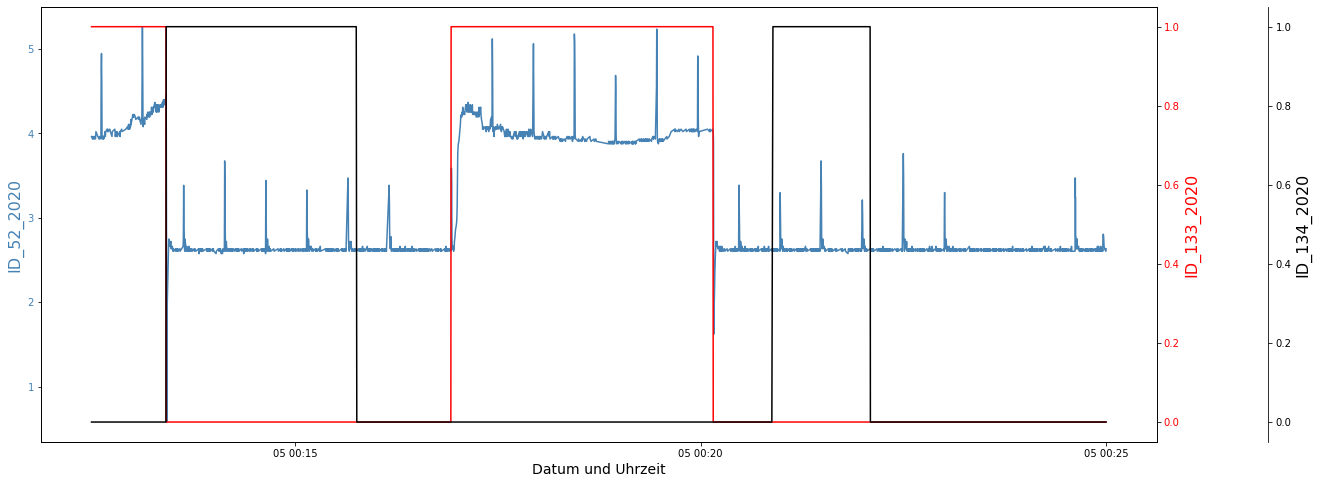

In [108]:
Daten_1=TREE_2


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_1['CreateDateTime']<'2020-08-05 00:25:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_52_2020', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue_52, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('ID_133_2020', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.TagValue_85, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
#plt.ylim((-1,10))

ax3 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax3.set_ylabel('ID_134_2020', color=col3, fontsize=16)
ax3.plot(Daten_1.CreateDateTime, Daten_1.TagValue_86, color=col3)
ax3.tick_params(axis='y', labelcolor=col3)
ax3.spines["right"].set_position(("axes", 1.1))

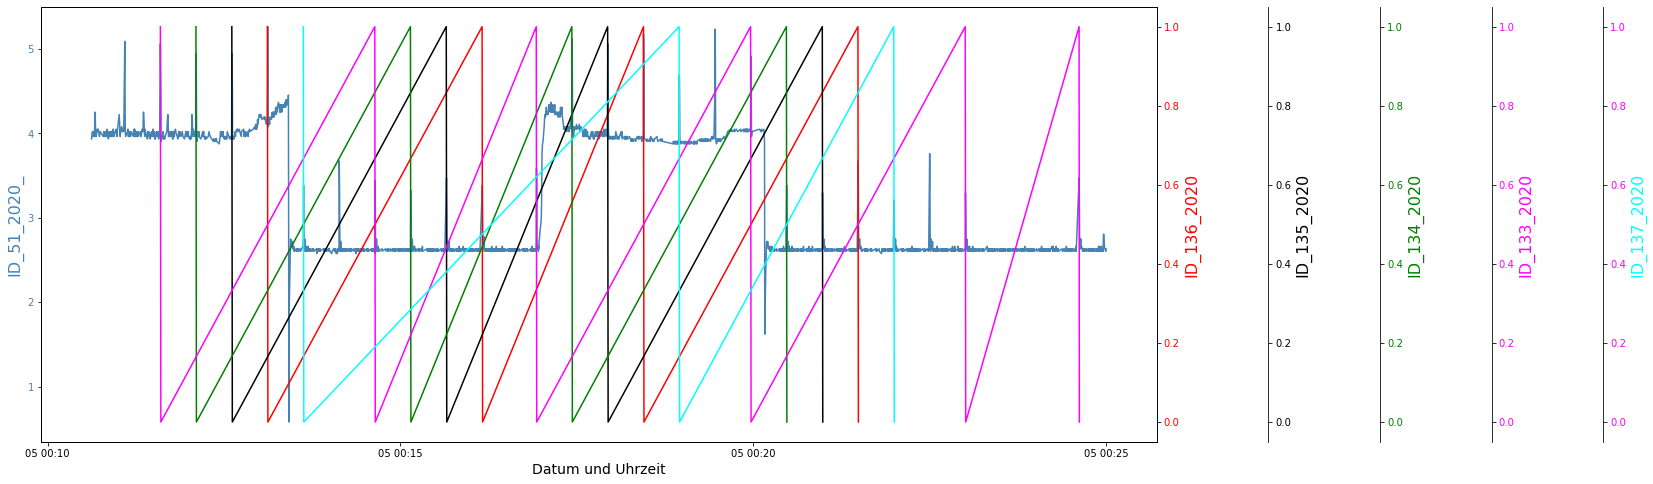

In [111]:
Daten_1=ID_52_2020_0809
Daten_2=ID_136_2020
Daten_3=ID_135_2020
Daten_4=ID_134_2020
Daten_5=ID_133_2020
Daten_6=ID_137_2020


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_1['CreateDateTime']<'2020-08-05 00:25:00')]
Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_2['CreateDateTime']<'2020-08-05 00:25:00')]
Daten_3=Daten_3[(Daten_3['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_3['CreateDateTime']<'2020-08-05 00:25:00')]
Daten_4=Daten_4[(Daten_4['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_4['CreateDateTime']<'2020-08-05 00:25:00')]
Daten_5=Daten_5[(Daten_5['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_5['CreateDateTime']<'2020-08-05 00:25:00')]
Daten_6=Daten_6[(Daten_6['CreateDateTime']>'2020-08-05 00:10:37')&(Daten_6['CreateDateTime']<'2020-08-05 00:25:00')]



fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_51_2020_', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))


#define second y-axis that shares x-axis with current plot


ax2 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax2.set_ylabel('ID_136_2020', color=col2, fontsize=16)
ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
#plt.ylim((-1,10))

ax3 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax3.set_ylabel('ID_135_2020', color=col3, fontsize=16)
ax3.plot(Daten_3.CreateDateTime, Daten_3.TagValue, color=col3)
ax3.tick_params(axis='y', labelcolor=col3)
ax3.spines["right"].set_position(("axes", 1.1))

ax4 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax4.set_ylabel('ID_134_2020', color=col4, fontsize=16)
ax4.plot(Daten_4.CreateDateTime, Daten_4.TagValue, color=col4)
ax4.tick_params(axis='y', labelcolor=col4)
ax4.spines["right"].set_position(("axes", 1.2))

ax5 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax5.set_ylabel('ID_133_2020', color=col5, fontsize=16)
ax5.plot(Daten_5.CreateDateTime, Daten_5.TagValue, color=col5)
ax5.tick_params(axis='y', labelcolor=col5)
ax5.spines["right"].set_position(("axes", 1.3))

ax6 = ax.twinx()
#ax2 = ax.twiny()
#add second line to plot
ax6.set_ylabel('ID_137_2020', color=col6, fontsize=16)
ax6.plot(Daten_6.CreateDateTime, Daten_6.TagValue, color=col6)
ax6.tick_params(axis='y', labelcolor=col5)
ax6.spines["right"].set_position(("axes", 1.4))

In [22]:
TREE_2.isnull().sum()

CreateDateTime       0
TagValue_52          0
TagValue_85          0
TagValue_45          0
TagValue_70          0
TagValue_86          0
TagValue_133         0
TagValue_134         0
TagValue_135         0
TagValue_136         0
TagValue_137         0
TagValue_138         0
diff_float           0
TagValue_133_lag1    0
TagValue_133_lag2    0
TagValue_134_lag1    0
TagValue_134_lag2    0
TagValue_135_lag1    0
TagValue_135_lag2    0
TagValue_136_lag1    0
TagValue_136_lag2    0
TagValue_137_lag1    0
TagValue_137_lag2    0
TagValue_138_lag1    0
TagValue_138_lag2    0
timestamp            0
diff_52              0
dtype: int64

In [23]:
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52
1769,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350258,-0.028935
1770,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350469,0.028935
1771,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350678,-0.028935
1772,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351283,0.028935
1773,2020-08-05 00:12:31.492,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351492,-0.028935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624218,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599012,0.173612
2624219,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599218,-0.086806
2624220,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599424,-0.028935
2624221,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599632,-0.057871


In [24]:
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52
0,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350258,-0.028935
1,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350469,0.028935
2,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350678,-0.028935
3,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351283,0.028935
4,2020-08-05 00:12:31.492,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351492,-0.028935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622449,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599012,0.173612
2622450,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599218,-0.086806
2622451,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599424,-0.028935
2622452,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599632,-0.057871


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

columns = [col for col in TREE_2.columns if col not in ['index','CreateDateTime', 'TagValue_52']]
X = TREE_2[columns]
y = TREE_2['TagValue_52']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
 
 
 
# 创建成lgb特征的数据集格式
lgb_train = lgb.Dataset(X_train, y_train) # 将数据保存到LightGBM二进制文件将使加载更快
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)  # 创建验证数据
 
# 将参数写成字典下形式
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression', # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,   # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9, # 建树的特征选择比例
    'bagging_fraction': 0.8, # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1 # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}
 
print('Start training...')
# 训练 cv and train
gbm = lgb.train(params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5) # 训练数据需要参数列表和数据集
 
print('Save model...') 
 
gbm.save_model('model.txt')   # 训练后保存模型到文件
 
print('Start predicting...')
# 预测数据集
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration) #如果在训练期间启用了早期停止，可以通过best_iteration方式从最佳迭代中获得预测
# 评估模型
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5) # 计算真实值和预测值之间的均方根误差

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 2097963, number of used features: 25
[LightGBM] [Info] Start training from score 3.348225
[1]	valid_0's l2: 0.492841	valid_0's auc: 0.795518
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l2: 0.447913	valid_0's auc: 0.999828
[3]	valid_0's l2: 0.407326	valid_0's auc: 0.999828
[4]	valid_0's l2: 0.370645	valid_0's auc: 0.999828
[5]	valid_0's l2: 0.337686	valid_0's auc: 0.999831
[6]	valid_0's l2: 0.307733	valid_0's auc: 0.999831
[7]	valid_0's l2: 0.281047	valid_0's auc: 0.999831
[8]	valid_0's l2: 0.256588	valid_0's auc: 0.999831
[9]	valid_0's l2: 0.234515	valid_0's auc: 0.999831
[10]	valid_0's l2: 0.214535	valid_0's auc: 0.999831


In [25]:
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_135_lag1,TagValue_135_lag2,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52
0,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350258,-0.028935
1,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350469,0.028935
2,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586350678,-0.028935
3,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351283,0.028935
4,2020-08-05 00:12:31.492,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1596586351492,-0.028935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622449,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599012,0.173612
2622450,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599218,-0.086806
2622451,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599424,-0.028935
2622452,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1597881599632,-0.057871


In [26]:
g = ID_85_2020
g['CreateDateTime_0'] = g['CreateDateTime']
g

,CreateDateTime,TagValue,TagId,CreateDateTime_0
0,2020-02-06 13:05:56.982,0.0,85,2020-02-06 13:05:56.982
1,2020-02-06 13:06:28.636,1.0,85,2020-02-06 13:06:28.636
2,2020-02-06 13:08:47.160,0.0,85,2020-02-06 13:08:47.160
3,2020-02-06 13:12:33.485,1.0,85,2020-02-06 13:12:33.485
4,2020-02-06 13:21:29.363,0.0,85,2020-02-06 13:21:29.363
...,...,...,...,...
25193,2020-12-18 23:28:07.454,0.0,85,2020-12-18 23:28:07.454
25194,2020-12-18 23:32:33.546,1.0,85,2020-12-18 23:32:33.546
25195,2020-12-18 23:40:17.384,0.0,85,2020-12-18 23:40:17.384
25196,2020-12-18 23:54:41.608,1.0,85,2020-12-18 23:54:41.608


In [27]:
TREE_2 = zusammen(g,TREE_2)
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52,TagValue,CreateDateTime_0
0,2020-08-05 00:06:37.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-08-05 00:06:37.410
1,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,NaN,NaT
2,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,NaN,NaT
3,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,NaN,NaT
4,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622450,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,0.173612,NaN,NaT
2622451,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.086806,NaN,NaT
2622452,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.028935,NaN,NaT
2622453,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.057871,NaN,NaT


In [28]:
TREE_2['CreateDateTime_0'] = TREE_2['CreateDateTime_0'].fillna(method = "ffill")
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52,TagValue,CreateDateTime_0
0,2020-08-05 00:06:37.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2020-08-05 00:06:37.410
1,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,NaN,2020-08-05 00:06:37.410
2,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,NaN,2020-08-05 00:06:37.410
3,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,NaN,2020-08-05 00:06:37.410
4,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,NaN,2020-08-05 00:06:37.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622450,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,0.173612,NaN,2020-08-19 23:57:34.905
2622451,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.086806,NaN,2020-08-19 23:57:34.905
2622452,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.028935,NaN,2020-08-19 23:57:34.905
2622453,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.057871,NaN,2020-08-19 23:57:34.905


In [29]:
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2['deltatime'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_0'] 
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52,CreateDateTime_0,deltatime
0,2020-08-05 00:06:37.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-05 00:06:37.410,0 days 00:00:00
1,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,0 days 00:05:52.848000
2,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,2020-08-05 00:06:37.410,0 days 00:05:53.059000
3,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,0 days 00:05:53.268000
4,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,2020-08-05 00:06:37.410,0 days 00:05:53.873000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622450,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,0.173612,2020-08-19 23:57:34.905,0 days 00:02:24.107000
2622451,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.086806,2020-08-19 23:57:34.905,0 days 00:02:24.313000
2622452,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.028935,2020-08-19 23:57:34.905,0 days 00:02:24.519000
2622453,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.057871,2020-08-19 23:57:34.905,0 days 00:02:24.727000


In [31]:
TREE_2['deltatime'] = TREE_2['deltatime'].dt.total_seconds()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52,CreateDateTime_0,deltatime
0,2020-08-05 00:06:37.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-05 00:06:37.410,0.000
1,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,352.848
2,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,2020-08-05 00:06:37.410,353.059
3,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,353.268
4,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,2020-08-05 00:06:37.410,353.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622450,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,0.173612,2020-08-19 23:57:34.905,144.107
2622451,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.086806,2020-08-19 23:57:34.905,144.313
2622452,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.028935,2020-08-19 23:57:34.905,144.519
2622453,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.057871,2020-08-19 23:57:34.905,144.727


In [32]:
TREE_2 = TREE_2.dropna()
TREE_2

,CreateDateTime,TagValue_52,TagValue_85,TagValue_45,TagValue_70,TagValue_86,TagValue_133,TagValue_134,TagValue_135,TagValue_136,...,TagValue_136_lag1,TagValue_136_lag2,TagValue_137_lag1,TagValue_137_lag2,TagValue_138_lag1,TagValue_138_lag2,timestamp,diff_52,CreateDateTime_0,deltatime
1,2020-08-05 00:12:30.258,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,352.848
2,2020-08-05 00:12:30.469,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,2020-08-05 00:06:37.410,353.059
3,2020-08-05 00:12:30.678,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,353.268
4,2020-08-05 00:12:31.283,3.964120,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,0.028935,2020-08-05 00:06:37.410,353.873
5,2020-08-05 00:12:31.492,3.935185,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.596586e+12,-0.028935,2020-08-05 00:06:37.410,354.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622450,2020-08-19 23:59:59.012,4.629630,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,0.173612,2020-08-19 23:57:34.905,144.107
2622451,2020-08-19 23:59:59.218,4.542824,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.086806,2020-08-19 23:57:34.905,144.313
2622452,2020-08-19 23:59:59.424,4.513889,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.028935,2020-08-19 23:57:34.905,144.519
2622453,2020-08-19 23:59:59.632,4.456018,1.0,1.0,89.797974,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.597882e+12,-0.057871,2020-08-19 23:57:34.905,144.727


In [61]:
columns = [col for col in TREE_2.columns if col not in ['index','CreateDateTime', 'TagValue_52']]
X_0 = TREE_2[columns]
y_0 = TREE_2['TagValue_52']
X,X_test,y,y_test =train_test_split(X_0,y_0,test_size=0.2)

In [65]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
         }

In [66]:
%%time
from sklearn.metrics import roc_auc_score

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)


splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=500)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += clf.predict(X_test) / NFOLDS
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

Training until validation scores don't improve for 500 rounds
[200]	training's auc: 0.999984	valid_1's auc: 0.999814
[400]	training's auc: 0.999991	valid_1's auc: 0.999822
[600]	training's auc: 0.999994	valid_1's auc: 0.999826
[800]	training's auc: 0.999995	valid_1's auc: 0.999827
[1000]	training's auc: 0.999996	valid_1's auc: 0.999827
Early stopping, best iteration is:
[656]	training's auc: 0.999994	valid_1's auc: 0.999828


ValueError: continuous format is not supported

In [ ]:
lgb_params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    'metric': {'binary_logloss', 'auc'},  #二进制对数损失
    "learning_rate": 0.01,
    "max_depth": 7,
    "num_leaves": 105,
    "feature_fraction": 1,
    "bagging_fraction": 1,     
    'min_data_in_leaf': 100,  
    'bagging_freq': 6, 
    "nthread":30
    
}
 
 
def pred_select(label_name,column_name):
    if label_name == 'favorite':
        labels = train.favorite
    else:
        labels = train.purchase
    x = train_feature.values
    y = labels
    y_val = np.zeros((train_feature.shape[0]))#创建测试集
    y_test = np.zeros((test_feature.shape[0]))#创建测试集
    score_valid=[]
    
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    for train_index,valid_index in skf.split(x,y):
        x_train,x_valid,y_train,y_valid = x[train_index],x[valid_index],y[train_index],y[valid_index]#
        #传入测试集数据 ，skf.split将数据集划分，划分后结果为索引，通过train_feature.values[索引值]访问
        
        train_data = lgb.Dataset(x_train,label=y_train)
        valid_data = lgb.Dataset(x_valid,label=y_valid)
        model = lgb.train(lgb_params,train_data,valid_sets=[valid_data],verbose_eval=1)
        y_val[valid_index] = model.predict(x_valid)
        score_valid.append(roc_auc_score(y_valid,y_val[valid_index]))
        y_test += np.array(model.predict(test_feature)/5)
    score_valid = np.array(score_valid)
    y_test = pd.DataFrame(y_test,columns=[column_name])
    print(label_name+'验证集结果：{}'.format(score_valid.mean()))
    return y_test  
 
fav_test = pred_select('favorite','pred_favorite')  

In [25]:
scores = []
feature_importance = pd.DataFrame()
models = []
columns = [col for col in TREE_2.columns if col not in ['index','CreateDateTime', 'TagValue_52']]
X = TREE_2[columns]
y = TREE_2['TagValue_52']

In [64]:
params = {'objective': 'regression',
          'learning_rate': 0.3,
          "boosting_type": "gbdt",
          "metric": 'mae',
          'n_jobs': -1,
          'min_data_in_leaf':32,
          'num_leaves':1024,
         }

In [34]:
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
kf = KFold(n_splits=5,shuffle=True)
for train_index , test_index in kf.split(X):
    print('train_index:%s , test_index: %s ' %(train_index,test_index))
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    model = lgb.LGBMRegressor(**params, n_estimators=10000)
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            verbose=1000, early_stopping_rounds=15)
    score = metrics.mean_absolute_error(y_valid, model.predict(X_valid))
    
    models.append(model)
    scores.append(score)

    fold_importance = pd.DataFrame()
    fold_importance["feature"] = columns
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

train_index:[      0       2       4 ... 2622450 2622451 2622453] , test_index: [      1       3       9 ... 2622444 2622448 2622452] 
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
Training until validation scores don't improve for 15 rounds
[1000]	training's l1: 0.0187463	valid_1's l1: 0.0245401
[2000]	training's l1: 0.0167516	valid_1's l1: 0.0227417
[3000]	training's l1: 0.0154155	valid_1's l1: 0.0215913
[4000]	training's l1: 0.0144227	valid_1's l1: 0.0207371
[5000]	training's l1: 0.0136191	valid_1's l1: 0.0200486
[6000]	training's l1: 0.0129763	valid_1's l1: 0.0194597
[7000]	training's l1: 0.0124191	valid_1's l1: 0.0190158
[8000]	training's l1: 0.011937	valid_1's l1: 0.0186436
[9000]	training's l1: 0.0115233	valid_1's l1: 0.0182854
[10000]	training's l1: 0.0111544	valid_1's l1: 0.0179816
Did not meet early stopping. Best iteration is:
[10000]	training's l1: 0.0111544	valid_1's l1: 0.0179816


ValueError: Length of values (2097963) does not match length of index (25)

In [24]:
# folds = GroupKFold(n_splits=5)
# for fold_n, (train_index, valid_index) in enumerate(folds.split(TREE_2, y, groups=TREE_2['diff_float'])):
#     print(f'Fold {fold_n} started at {time.ctime()}')
#     X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
#     model = lgb.LGBMRegressor(**params, n_estimators=10000)
#     model.fit(X_train, y_train, 
#             eval_set=[(X_train, y_train), (X_valid, y_valid)],
#             verbose=1000, early_stopping_rounds=15)
#     score = metrics.mean_absolute_error(y_valid, model.predict(X_valid))
    
#     models.append(model)
#     scores.append(score)

#     fold_importance = pd.DataFrame()
#     fold_importance["feature"] = columns
#     fold_importance["importance"] = model.feature_importances_
#     fold_importance["fold"] = fold_n + 1
#     feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

Fold 0 started at Fri Sep 30 11:52:14 2022
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[27]	training's l1: 44.0146	valid_1's l1: 44.3659
Fold 1 started at Fri Sep 30 11:52:21 2022
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[25]	training's l1: 44.0059	valid_1's l1: 44.7095
Fold 2 started at Fri Sep 30 11:52:28 2022
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[30]	training's l1: 44.0594	valid_1's l1: 44.3671
Fold 3 started at Fri Sep 30 11:52:35 2022
[LightGBM] [Warning] min

In [29]:
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

CV mean score: 43.8159, std: 0.6407.


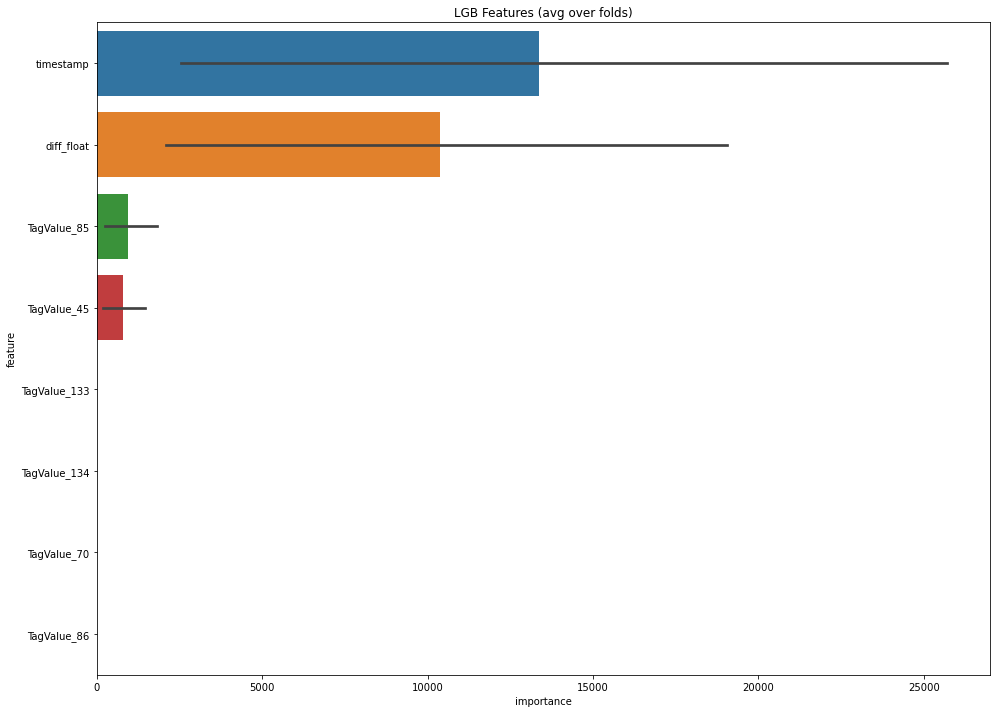

In [30]:
feature_importance["importance"] /= 5
cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
plt.title('LGB Features (avg over folds)');